#  **Logistic Regression**


----

## 1. 介绍

本文使用公开的 "肥胖风险预测 (Obesity Risk Prediction)" 数据集，构建一个多分类的算法模型，用于预测每个人的肥胖程度。

本文涉及到的知识点：

- 分类模型: LogisticRegression

- 数据预处理：OneHotEncoder

- 模型评估: accuracy_score, log_loss

- 多分类任务: One-vs-All (OvA), One-vs-One (OvO)

### 库文件

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

### 数据集

本次实验所用的数据集是公开的 “肥胖风险预测（Obesity Risk Prediction）” 数据集，该数据集包含共 17 个属性和 2,111 条样本记录。以下是数据集的各属性说明：


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">变量名</th>
    <th class="tg-7zrl">数据类型</th>
    <th class="tg-7zrl">描述</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">类别型</td>
    <td class="tg-7zrl">性别</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">连续型</td>
    <td class="tg-7zrl">年龄</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">连续型</td>
    <td class="tg-7zrl">身高</td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">连续型</td>
    <td class="tg-7zrl">体重</td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">二元</td>
    <td class="tg-7zrl">家族成员中是否有人曾经或现在超重?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">二元</td>
    <td class="tg-7zrl">你经常吃高热量食物吗?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">整数型</td>
    <td class="tg-7zrl">你通常在餐食中吃蔬菜吗?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">连续型</td>
    <td class="tg-7zrl">你每天吃几顿主食?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">类别型</td>
    <td class="tg-7zrl">你会在两餐之间吃零食吗?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">二元</td>
    <td class="tg-7zrl">你抽烟吗?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">连续型</td>
    <td class="tg-7zrl">每天喝多少水?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">二元</td>
    <td class="tg-7zrl">你是否监控自己每天摄入的热量?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">连续型</td>
    <td class="tg-7zrl">你多久进行一次体育活动?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">整数型</td>
    <td class="tg-7zrl">你每天使用手机、电子游戏、电视、电脑等电子设备的时间有多少?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">类别型</td>
    <td class="tg-7zrl">多久摄入一次酒精?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">类别型</td>
    <td class="tg-7zrl">经常使用的交通工具?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">类别型</td>
    <td class="tg-7zrl">肥胖程度</td>
  </tr>
</tbody></table>


导入数据集


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 2. 模型简介

### 2.1 逻辑回归简介

尽管名字中有 “回归” 二字，逻辑回归其实是一种分类算法，主要用于预测一个样本属于某个类别的概率。

例如：

- 判定邮件是否为垃圾邮件（是/否）

- 判断病人是否患有某种疾病（阳性/阴性）

#### **由线性回归引入逻辑回归**

从**线性回归无法胜任分类任务**的问题说起。

线性回归用于分类问题：

- 输出不受限制：
  
  线性回归的输出是连续实数（$y = wx+b \in R$），而分类任务需要输出概率或离散标签（比如 0 或 1）

- 阈值切分不稳定：
  
  人为地对线性回归输出设置一个阈值（如 $p \geq 0.5$ 判为 1）并不能保证模型泛化好，尤其当输入值远离训练集分布时，输出可能超过 $[0,1]$ 甚至反向预测

**逻辑回归如何改进线性回归？**

逻辑回归本质上是在**线性回归的输出基础上加了一个非线性映射（Sigmoid）**，使其适合做分类。

逻辑回归模型如下：

$$P(y=1|x) = \hat{y} = \sigma(w^{T}x+b) = \frac{1}{1+e^{-(w^{T}x+b)}}$$

特点：

- 把线性回归输出 $z=w^{T}x+b$ 映射到 $(0,1)$

- 输出可以解释为 “预测为正类（1）” 的概率

- 输出曲线在 $z=0$ 附近变化迅速，有清晰的决策边界

### 2.2 基本思想

逻辑回归的基本思想是：

- 输入一组特征 $x$

- 通过一个线性函数计算 $z = w^{T}x + b$

- 通过 $Sigmoid$ 函数将结果映射到 $(0,1)$ 区间，作为属于正类（标签为1）的概率

$Sigmoid$ 函数公式：

$$\sigma(z) = \frac{1}{1 + e^{-z}} $$

如果：

- $\sigma(z) \geq 0.5$，预测为正类（1）

- $\sigma(z) \lt 0.5$，预测为负类（0）

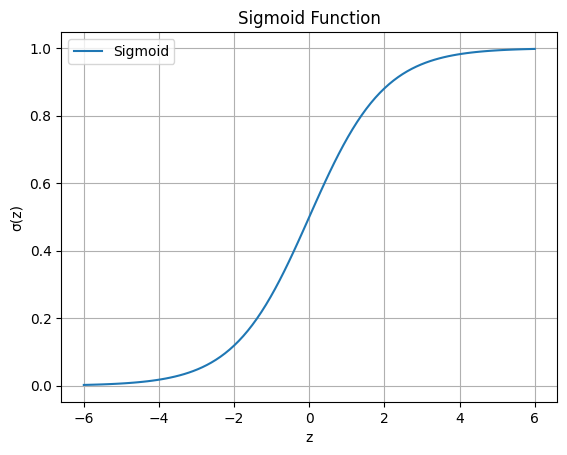

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-6, 6, 100)
y = sigmoid(x)

plt.plot(x, y, label="Sigmoid")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.title("Sigmoid Function")
plt.grid()
plt.legend()
plt.show()

### 2.3 损失函数

#### **单个训练实例的损失函数**

单个训练实例使用**二元交叉熵损失（Binary Cross-Entropy Loss）**，令：

- $x$ 是输入特征

- $y \in \{0,1\}$ 是真实标签

- $\hat{y}=\sigma(w^{T}x+b)$ 是**模型预测的概率** ($\hat{y} \in [0,1]$)

则该样本的损失函数为：

$$J(\hat{y},y) = -[y\cdot\log(\hat{y}) + (1-y)\cdot\log(1-\hat{y})]$$

该损失函数的意义是：

- 如果真实标签 $y=1$，那么成本为 $-\log(\hat{y})$

- 如果真实标签 $y=0$，那么成本为 $-\log(1-\hat{y})$

这表示：

- 当模型预测越接近正确标签时，损失越小

- 当模型预测越偏离真实标签时，损失越大

用极端情况举例说明：

- $y=1$, $\hat{y}=0$ $\rarr$ $J(\hat{y},y) = -\log(0)$ $\rarr$ $-\lim_{\hat{y} \to 0} \log(\hat{y}) = -\cdot(-\infin) = \infin$
  
- $y=0$, $\hat{y}=1$ $\rarr$ $J(\hat{y},y) = -\log(1-1)$ $\rarr$ $-\lim_{1-\hat{y} \to 0} \log(1-\hat{y}) = -\cdot(-\infin) = \infin$

这两种情况下，预测错误的损失均为 $\infin$。

#### **逻辑回归的损失函数**

逻辑回归使用的是**对数损失函数（Log Loss）**：

$$L(w) = -\frac{1}{m}\sum_{i=1}^{m}[y^{i}\log(\hat{y}^{i}) + (1-y^{i})\log(1-\hat{y}^{i})] $$

其中：

- $\hat{y}^{i} = \sigma(w^{T}x^{i} + b)$

- $y^{i}$ 是样本的真实标签（0 或 1）

通过**梯度下降**等优化算法来最小化损失函数，学习模型参数 $w$ 和 $b$。

\*
需特别注意，$\log$ 函数内的值是预测值，函数外的乘子是实际值，对数损失函数用二者的乘积来衡量当模型预测错误时的代价/损失。

### 2.4 决策边界

#### **逻辑回归的决策边界**

逻辑回归的预测公式是：

$$\hat{y} = \sigma(w^{T}x+b) = \frac{1}{1 + e^{-(w^{T}x+b)}}$$

这是一个输出在 $(0,1)$ 之间的概率值，表示样本属于 “正类” 的概率。

通常我们设置一个分类阈值（比如 0.5）：

- 当 $\hat{y} \geq 0.5$，预测为正类

- 当 $\hat{y} \lt 0.5$，预测为负类

那么对应的条件是：

$$\sigma(w^{T}x+b) \geq 0.5 \hArr w^{T}x+b \geq 0$$

因此，将 $w^{T}x+b=0$ 视为两个类别的分界线——这就是所谓的**决策边界**。

#### **决策边界的几何意义**

- 对于二维特征 $x = (x_{1}, x_{2})$，决策边界是一个**直线**

- 对于三维特征，决策边界是一个**平面**

- 高维特征时，决策边界是一个**超平面**

它将特征空间划分为两个区域：

- 一侧对应 $\hat{y} \geq 0.5$，预测为正类

- 另一侧对应 $\hat{y} \lt 0.5$，预测为负类

### 2.5 模型总结

优点：

- 简单易实现，计算效率高

- 输出为概率，便于解释和调整阈值

- 对线性可分问题表现良好

- 可以加入 $L1$ 或 $L2$ 正则项以防止过拟合

缺点：

- 本质是线性模型，难以处理非线性关系 
  
  -> 可以通过以下方法处理非线性可分数据：

  - 核函数（Kernel），将原始数据集进行升维来找到一个线性可分超平面

  - 在决策边界函数（$z = w^{T}x+b$ 或写作 $w^{T}x+b = 0$）中引入非线性特征，如多项式（Polynomial），对数（Logarithm）

  但仍建议使用更合适的模型来处理非线性可分数据，如SVM，Decision Tree等

- 对异常值敏感 
  
  -> 在数据预处理中，数据归一化/标准化是必要的，防止**度量**对模型拟合的影响

  **数据归一化/标准化必要场所**：

  - 使用**梯度下降**算法，即所有**线性模型**（如 LinearRegression, LogisticRegression）

  - 使用**距离度量**（如 KNN, SVM, K-Means）

- 仅适用于二分类任务 
  
  -> 可以引用 `sklearn.multi_class` 中的 `OneVsOneClassifier` 和 `OneVsRestClassifier` 来解决多分类任务

  - `OneVsOneClassifier` 针对任意两个特征进行训练，若使用全部特征 (N) 会得到 $\binom{N}{2}$ 个训练器

  - `OneVsRestClassifier` 将任意一个特征取出作为‘正类’，其他特征作为‘负类’，若使用全部特征会得到 $N$ 个训练器

## 3. 探索性数据分析


通过可视化目标变量的类别分布，判断样本是否存在类别不平衡问题。

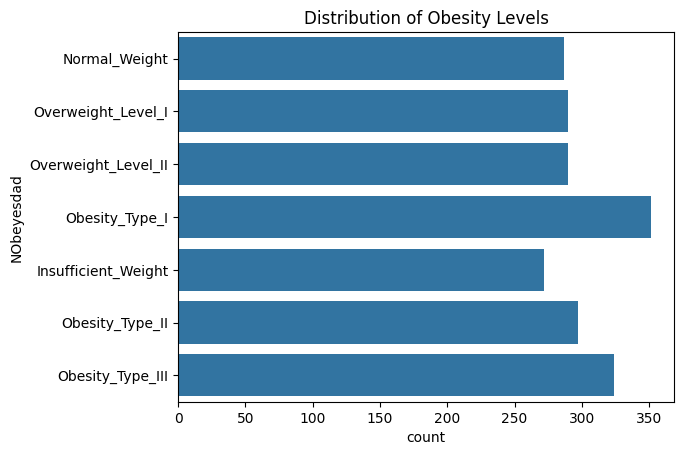

In [4]:
# 目标变量的分布
sns.countplot(y='NObeyesdad', data=data)
plt.title('Distribution of Obesity Levels')
plt.show()

In [5]:
target_variable = data['NObeyesdad'] 
target_variable.value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

从结果来看，数据集的各类别分布较为均衡，因此在模型训练阶段无需特别处理类别不平衡问题。

### 3.1 缺失值

使用 `.info()` 和 `.describe()` 方法查看数据集的基本信息与统计摘要，并检查是否存在缺失值。

In [6]:
# 检查缺失值
data.isnull().sum() 

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

关于 `.info()` 的使用：

显示数据的结构信息，包括每列的类型，非空值数量，内存使用等。

In [7]:
# 数据摘要
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

关于 `.describe()` 的使用：

`data.describe()` 默认输出数值型特征，等价于 `data.describe(include='number')`。

- `data.describe(include='all')`: 输出全部数据特征，类别型特征使用 np.nan 填充

- `data.describe(include='object')`: 输出类别型特征，包括 count, unique, top, freq

In [8]:
# 统计性数据特征
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


\*
关于缺失值的检查，可以使用以下代码得到更详细的信息：

```python
missing_data = data.isnull() # 转化为矩阵，包含缺失值的信息
cols = missing_data.columns.tolist() # 取出列名称，并转化为 list

for col in cols:
    print(missing_data[col].value_counts()) # 对每一列的缺失值进行分析

### 3.2 特征缩放

对数值型特征进行标准化处理，以统一其取值范围，从而提升模型的表现效果。

In [9]:
# 标准化连续性数值特征
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# 转化为 DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# 与原始数据集合并
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)
scaled_data

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991


数据标准化对于更清晰地划分类别之间的决策边界非常重要，因为它确保了各特征的变化在相似的尺度范围内。经过标准化处理后，数据已准备好用于模型的训练和测试。

### 3.3 独热编码

将类别变量转换为数值格式，采用独热编码（`OneHotEncoder`）方法。

独热编码是一种将**分类变量**转换为**二进制向量**的编码方法，主要用于机器学习中处理非数值型特征（如颜色、国家、类别等）。其核心思想是为每个类别分配一个唯一的二进制向量，其中只有一位为1（表示激活），其余为0。

示例：

- 输入：具有 N 个不同类别的离散特征（‘红’，‘绿’，‘蓝’）

- 输出：每个类别转换为长度为 N 的二进制向量，且仅有一个元素为 1

    | 原始类别   |	独热编码   |
    |:------|:--------------------------------|
    |红 | [1,0,0] |
    |绿 | [0,1,0]  |
    |蓝	| [0,0,1] |

\*
独热编码适用于无序的类别变量（如‘教育水平’等含有隐性**等级/顺序关系**的变量则不适合独热编码，可考虑标签编码（`LabelEncoder`）），不会被类别之间的数值关系误导。但类别数较多的情况下，会导致维度急剧增加（高维稀疏矩阵）。

In [10]:
# 提取类别型特征
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad') 

# 独热编码
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# sparse_output=False: 稀疏矩阵，即多数元素为 0 的矩阵；以稀疏矩阵储存数据可节省内存，但不方便后续处理
# drop='first': 去除分离后的第一个特征，防止多重共线性问题

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
prepped_data

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


可以看到，所有类别变量已成功转换为独热编码，整体特征数量增至24个。

### 3.4 目标变量

将目标变量转化为数值表示的类别型变量。

In [11]:
# 对目标变量进行编码
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [12]:
target_variables = prepped_data['NObeyesdad'] 
target_variables.value_counts()

NObeyesdad
2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: count, dtype: int64

分离 输入特征 与 目标变量，用于后续建模。


In [13]:
X = prepped_data.drop('NObeyesdad', axis=1)
y = prepped_data['NObeyesdad']

## 4. 模型训练与评估

`train-test split`

In [14]:
# 分离 训练集 与 样本集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 4.1 一对多（One-vs-All）逻辑回归
在 One-vs-All（OvA）方法中：

- 对于每一个类别，算法都训练一个**二分类器**

- 每个分类器的目标是将该类与“所有其他类别”区分开

- 如果共有 $k$ 个类别，则需要训练 $k$ 个二分类器

- 在预测时，算法会对每个输入样本应用所有 $k$ 个分类器，选取**置信度最高**的那个类别作为最终预测结果


优点:

- 实现简单，训练时只需构建 $k$ 个模型

- 特别适合那些**能输出概率或置信度分数**的算法（如逻辑回归、支持向量机）

- 在多数多分类场景中效果稳定，调试方便

缺点:

- **类别不平衡问题显著**：每个分类器面对的是“一个类 vs 其余类”，而“其余类”往往包含大量样本，容易造成训练偏差

- 对模型的**泛化能力要求较高**，因为它必须在极度不均衡的数据分布中依然准确地区分目标类


使用 One-vs-All 策略训练一个多分类的逻辑回归模型，并对其分类性能进行评估。

In [ ]:
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

# multi_class 是 LogisticRegression 的内置方法，可以直接调用 OvA 算法解决多分类问题

C:\Users\史雪儿\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

接下来，可以通过计算模型在未见测试集上的准确率（Accuracy），来衡量其在泛化能力方面的表现。

In [ ]:
# 模型预测
y_pred_ova = model_ova.predict(X_test)

# 模型评估
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


\*
也可以使用以下代码执行 OvA 分类：
```python
from sklearn.multiclass import OneVsRestClassifier # OvA 分类，对所有算法生效

base_model = LogisticRegression(max_iter=1000) # 定义基模型
model_ova = OneVsRestClassifier(base_model) # 定义 OvA 模型

model_ova.fit(X_train, y_train) # 模型训练

### 4.2 一对一（One-vs-One）逻辑回归

在 One-vs-One（OvO）策略中：
- 对于数据集中**每一对类别**，训练一个二分类器

- 如果共有 $k$ 个类别，则需要训练 $\frac{k(k-1)}{2}$ 个分类器

- 每个分类器只在两类样本之间进行训练，**忽略其他类别**

- 在预测时，所有分类器参与决策，每个分类器对它负责的两类样本投票，最终选出**得票最多的类别**作为预测结果

优点：
- 每个分类器只需处理两类样本，**训练效率高**，尤其适用于训练成本高的模型

- 因为每个模型专注于两个类别之间的区分，在某些场景中**分类精度更高**

缺点：
- 当类别数较多时，所需训练的分类器数量迅速增长，**计算成本较高**

- 使用投票机制时可能出现预测结果不明确（投票平局）的情况，需要额外处理


使用 One-vs-One 策略，基于逻辑回归算法训练多分类模型，并通过准确率等指标对其在测试集上的分类性能进行评估。

In [17]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

通过评估模型在未见测试数据上的准确率，来衡量其性能。

In [18]:
# 模型预测
y_pred_ovo = model_ovo.predict(X_test)

# 模型评估
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 92.2%


该案例中，OvO 策略 (92.2%) 明显优于 OvA 策略 (76.12%)，准确率高出约 16 个百分点。

### 4.3 特征重要性

逻辑回归模型中的系数 `coef_` 表示每个特征对模型预测结果的影响程度。在特征已标准化的前提下，系数的绝对值越大，说明该特征对模型越重要。

#### **OvA 策略下的特征重要性计算**

模型数量：
- $K$ 个逻辑回归模型（每类一个）

每个模型输出：
- 一个形如 $\text{coef}_{j}$ 的权重向量，对应第 $j$ 个类别与其他类别的对比

按平均绝对值计算整体重要性：
$$\text{Importance}^{(i)} = \frac{1}{K} \sum_{j=1}^{K} |\text{coef}^{(i)}_{j}| $$

- $i$ 表示特征 $x$，$i \in \{1,2,...,23\}$ (独热编码增加了特征数量)

- $j$ 表示目标变量 $y$，$j \in \{1,2,...,7\}$

- $\text{Importance}^{(i)}$ 表示特征 $i$ 在所有类别区分中平均的重要程度 

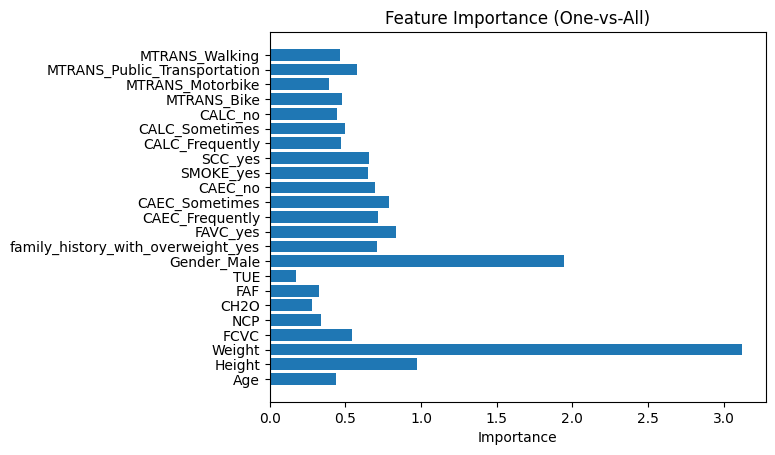

In [21]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-All)")
plt.xlabel("Importance")
plt.show()

#### **OvO 策略下的特征重要性计算**

模型数量：
- $\frac{K(K-1)}{2}$ 个逻辑回归模型（每对类别一个）

每个模型输出：
- 一个形如 $\text{coef}_{(p,q)}$ 的权重向量，对应类别 $p$ 与 $q$ 的对比模型

平均绝对值：
$$\text{Importance}^{(i)} = \frac{2}{K(K-1)} \sum_{(p,q)} |\text{coef}_{(p,q)}^{(i)}|$$

- $i$ 表示特征 $x$

- $(p,q)$ 均表示目标变量 $y$，$p\in \{1,2,...,7\}$，$p\in \{1,2,...,7\}$

\*
在 OvO 策略下，可以得到 $\frac{K(K-1)}{2}$ 个分类器，而每一个分类器均包含一个衡量特征 $i$ 的参数。因此对于每一个特征 $i$，可以从众多分类器中提取到 $\frac{K(K-1)}{2}$ 个参数 (本案例中为 21 个)，而后对其绝对值求和再平均，求解到特征重要性。

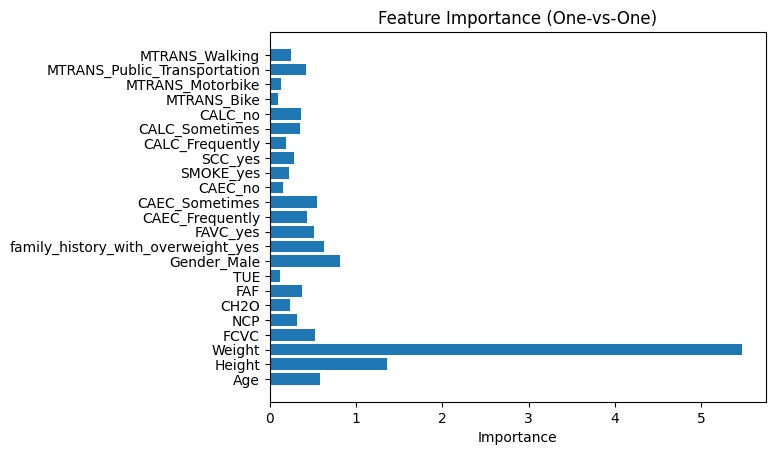

In [ ]:
# 汇总所有底层二分类器的系数
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# model_ovo.estimators_：遍历全部分类器, est 表示某一分类器
# est.coef_[0]：得到特定分类器的特征参数，est.coef_ 以 ‘list of list’ 的形式储存参数，因此使用 [0] 将其取出

# 对所有这些分类器的系数求平均
feature_importance = np.mean(np.abs(coefs), axis=0)

plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()